# **Task 2**
### Perform data cleaning and exploratory data analysis (EDA) on a dataset of your choice, such as the Titanic dataset from Kaggle. Explore the relationships between variables and identify patterns and trends in the data.

In [2]:
import pandas as pd

# Load the Titanic dataset files
train_df = pd.read_csv("/content/drive/MyDrive/Prodigy internship /train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/Prodigy internship /test.csv")
gender_submission_df = pd.read_csv("/content/drive/MyDrive/Prodigy internship /gender_submission.csv")

# Display basic information about the training dataset
train_info = train_df.info()
train_head = train_df.head()
train_description = train_df.describe(include='all')

(train_info, train_head, train_description)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(None,
    PassengerId  Survived  Pclass  \
 0            1         0       3   
 1            2         1       1   
 2            3         1       3   
 3            4         1       1   
 4            5         0       3   
 
                                                 Name     Sex   Age  SibSp  \
 0                            Braund, Mr. Owen Harris    male  22.0      1   
 1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
 2                             Heikkinen, Miss. Laina  female  26.0      0   
 3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
 4                           Allen, Mr. William Henry    male  35.0      0   
 
    Parch            Ticket     Fare Cabin Embarked  
 0      0         A/5 21171   7.2500   NaN        S  
 1      0          PC 17599  71.2833   C85        C  
 2      0  STON/O2. 3101282   7.9250   NaN        S  
 3      0            113803  53.1000  C123        S  
 4      0            373450  

Missing Values

Age → 177 missing values

Cabin → 687 missing values

Embarked → 2 missing values

# Clean data - handling missing values



In [3]:
# Copy the original dataframe to preserve it
clean_df = train_df.copy()

# Handle missing values
# Age: fill with median age grouped by Pclass and Sex for better accuracy
clean_df['Age'] = clean_df.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.median()))

# Embarked: fill missing with the most frequent value
clean_df['Embarked'].fillna(clean_df['Embarked'].mode()[0], inplace=True)

# Cabin: drop this column due to excessive missing values
clean_df.drop(columns=['Cabin'], inplace=True)

# Check again for missing values after cleaning
missing_values = clean_df.isnull().sum()

missing_values


/tmp/ipython-input-3-959517295.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  clean_df['Embarked'].fillna(clean_df['Embarked'].mode()[0], inplace=True)


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


✅ Missing values handled successfully:

Age: Filled using median based on Pclass and Sex.

Embarked: Filled with the most common value (S).

Cabin: Dropped due to too many missing entries.



## let's visualize relationships between survival and key features:
Age, Sex, Pclass, and Fare.



/tmp/ipython-input-4-2720357606.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=train_df, palette='Set2')


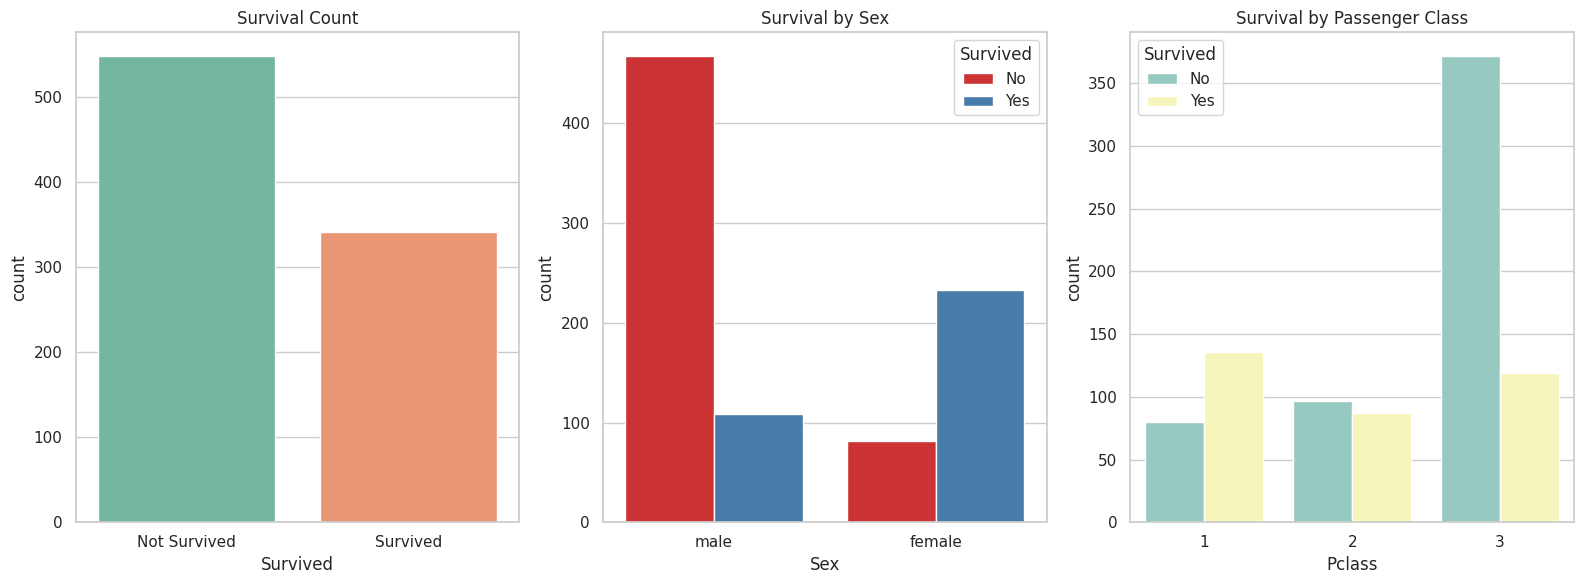

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(16, 6))

# Plot 1: Survival count
plt.subplot(1, 3, 1)
sns.countplot(x='Survived', data=train_df, palette='Set2')
plt.title('Survival Count')
plt.xticks([0, 1], ['Not Survived', 'Survived'])

# Plot 2: Survival by Sex
plt.subplot(1, 3, 2)
sns.countplot(x='Sex', hue='Survived', data=train_df, palette='Set1')
plt.title('Survival by Sex')
plt.legend(title='Survived', labels=['No', 'Yes'])

# Plot 3: Survival by Class
plt.subplot(1, 3, 3)
sns.countplot(x='Pclass', hue='Survived', data=train_df, palette='Set3')
plt.title('Survival by Passenger Class')
plt.legend(title='Survived', labels=['No', 'Yes'])

plt.tight_layout()
plt.show()


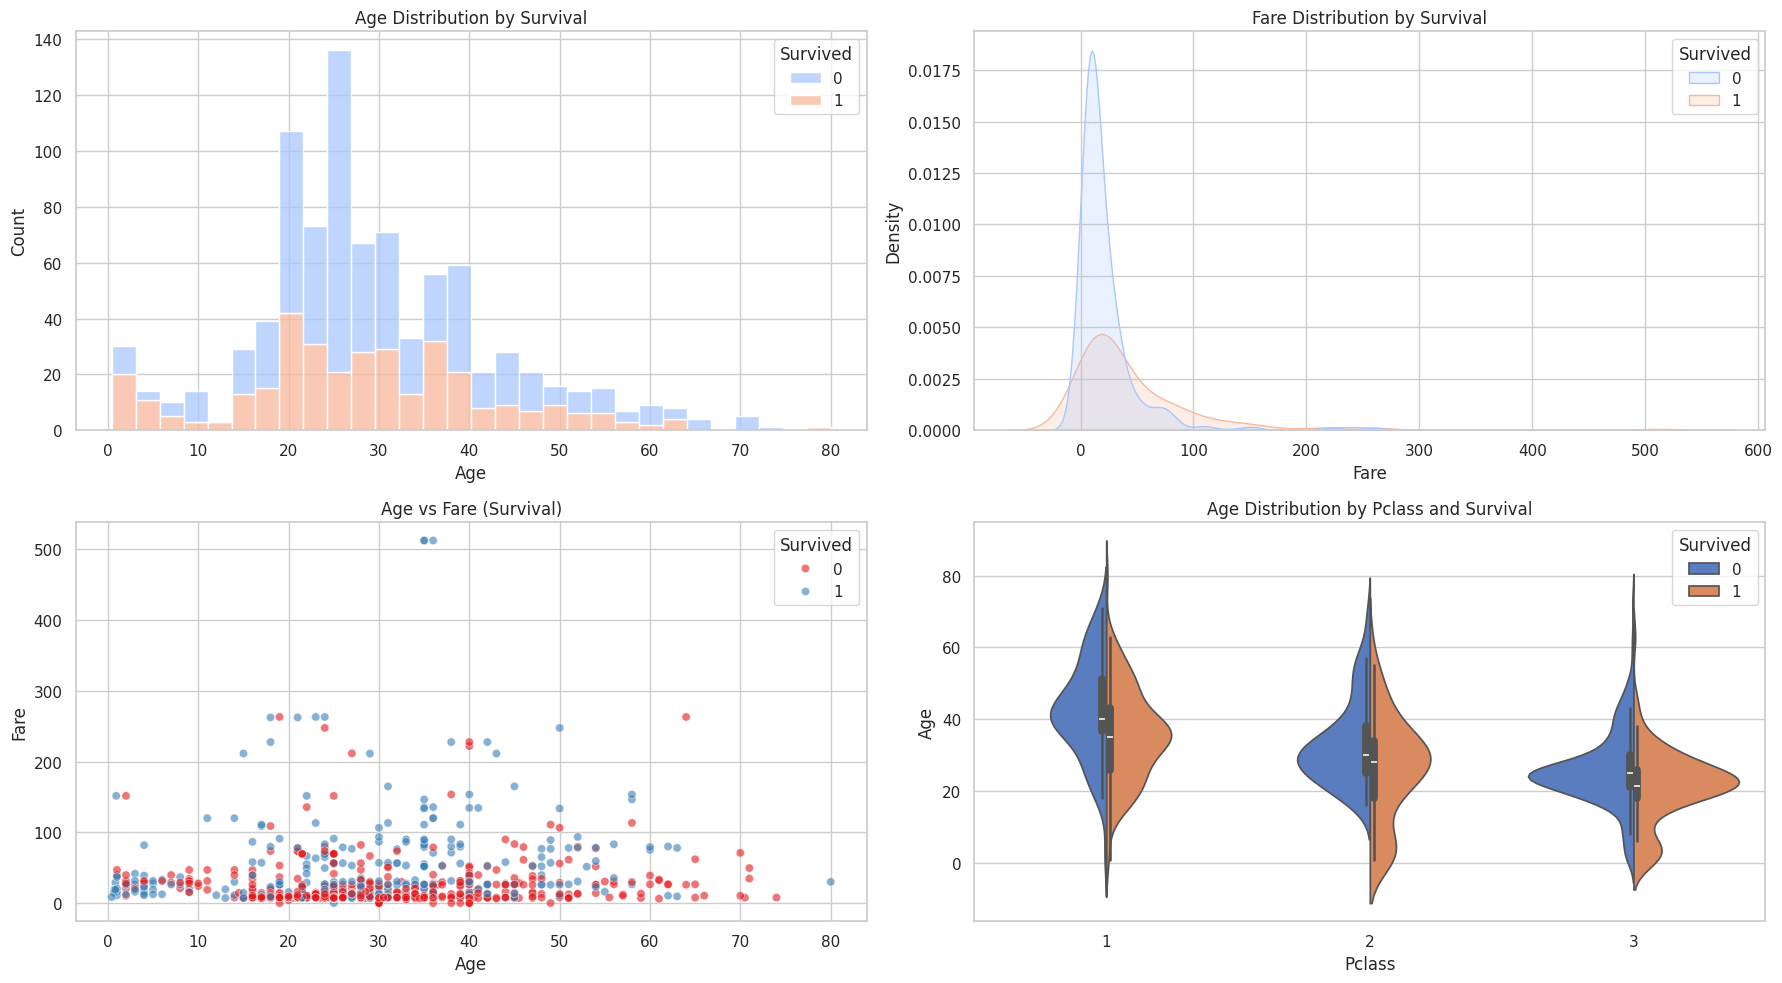

In [6]:
plt.figure(figsize=(18, 10))

# Plot 1: Age distribution by survival
plt.subplot(2, 2, 1)
sns.histplot(data=clean_df, x='Age', hue='Survived', multiple='stack', bins=30, palette='coolwarm')
plt.title('Age Distribution by Survival')
plt.xlabel('Age')

# Plot 2: Fare distribution by survival
plt.subplot(2, 2, 2)
sns.kdeplot(data=clean_df, x='Fare', hue='Survived', fill=True, palette='coolwarm')
plt.title('Fare Distribution by Survival')
plt.xlabel('Fare')

# Plot 3: Age vs Fare (color by survival)
plt.subplot(2, 2, 3)
sns.scatterplot(data=clean_df, x='Age', y='Fare', hue='Survived', palette='Set1', alpha=0.6)
plt.title('Age vs Fare (Survival)')

# Plot 4: Pclass vs Age with survival hue
plt.subplot(2, 2, 4)
sns.violinplot(data=clean_df, x='Pclass', y='Age', hue='Survived', split=True, palette='muted')
plt.title('Age Distribution by Pclass and Survival')

plt.tight_layout()
plt.show()
